In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("plot_style.txt")

In [2]:
df_kasus = pd.read_excel("dataset/dataset_kawal.xlsx", sheet_name="kasus", index_col="date")
df_kasus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 557 entries, 2020-03-02 to 2021-09-10
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   total_case   557 non-null    int64
 1   daily_case   557 non-null    int64
 2   active_case  557 non-null    int64
 3   cured        557 non-null    int64
 4   deceased     557 non-null    int64
dtypes: int64(5)
memory usage: 26.1 KB


In [3]:
df_kasus

,total_case,daily_case,active_case,cured,deceased
date,,,,,
2020-03-02,2,2,2,0,0
2020-03-03,2,0,2,0,0
2020-03-04,2,0,2,0,0
2020-03-05,2,0,2,0,0
2020-03-06,4,2,4,0,0
...,...,...,...,...,...
2021-09-06,4133433,4413,146271,3850689,136473
2021-09-07,4140634,7201,138630,3864848,137156
2021-09-08,4147365,6731,132823,3876760,137782


In [4]:
df_kasus.sort_values("daily_case", ascending=False)

,total_case,daily_case,active_case,cured,deceased
date,,,,,
2021-07-15,2726803,56757,480199,2176412,70192
2021-07-14,2670046,54517,443473,2157363,69210
2021-07-16,2780803,54000,504915,2204491,71397
2021-07-17,2832755,51952,527872,2232394,72489
2021-07-22,3033339,49509,561384,2392923,79032
...,...,...,...,...,...
2020-03-12,34,0,27,3,4
2020-03-07,4,0,4,0,0
2020-03-03,2,0,2,0,0


Text(0, 0.5, 'Jumlah Kasus')

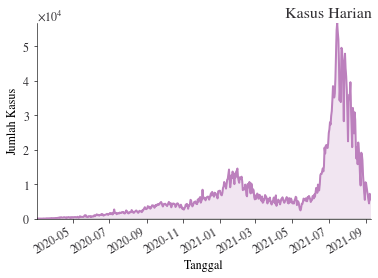

In [5]:
fig, ax = plt.subplots()

df_kasus["daily_case"].plot(ax=ax, title="Kasus Harian")
ax.fill_between(df_kasus.index, df_kasus["daily_case"], where=df_kasus["daily_case"]>np.zeros(len(df_kasus)), interpolate=True, alpha=0.2)
ax.set_xlim([df_kasus.index[0], df_kasus.index[-1]])
ax.set_ylim([0, df_kasus["daily_case"].max()])
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kasus")

Text(0, 0.5, 'Jumlah Kasus')

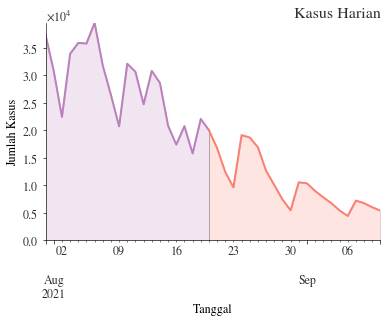

In [6]:
fig, ax = plt.subplots()

df_before = df_kasus.loc["2021-7-31":"2021-8-20"]
df_after = df_kasus.loc["2021-8-20":"2021-9-11"]

df_before["daily_case"].plot(ax=ax, title="Kasus Harian")
ax.fill_between(df_before.index, df_before["daily_case"], where=df_before["daily_case"]>np.zeros(len(df_before)), interpolate=True, alpha=0.2)

df_after["daily_case"].plot(ax=ax, title="Kasus Harian")
ax.fill_between(df_after.index, df_after["daily_case"], where=df_after["daily_case"]>np.zeros(len(df_after)), interpolate=True, alpha=0.2)

ax.set_xlim([df_before.index[0], df_after.index[-1]])
ax.set_ylim([0, df_before["daily_case"].max()])
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kasus")

Text(0, 0.5, 'Jumlah Kasus')

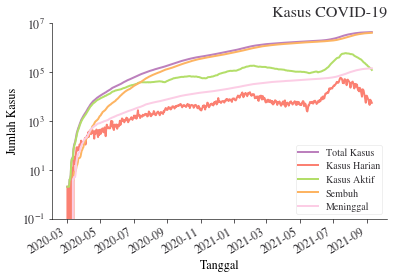

In [7]:
fig, ax = plt.subplots()

df_kasus.plot(ax=ax, logy=True, title="Kasus COVID-19")
ax.legend(["Total Kasus", "Kasus Harian", "Kasus Aktif", "Sembuh", "Meninggal"])
ax.set_xlabel("Tanggal")
ax.set_ylabel("Jumlah Kasus")

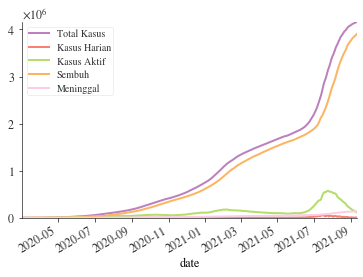

In [8]:
fig, ax = plt.subplots()

df_kasus.plot(ax=ax, logy=False)
ax.set_xlim([df_kasus.index[0], df_kasus.index[-1]])
ax.set_ylim([0, df_kasus.max().max()])
ax.legend(["Total Kasus", "Kasus Harian", "Kasus Aktif", "Sembuh", "Meninggal"])